In [62]:
# Obtain the ‘hsbdemo’ dataset from OA 5.6. 
#
# Create a kNN-based classifier from the reading, writing, mathematics, and science 
# scores of the high school students. Evaluate the  classifiers’ accuracy in 
# predicting which academic program the student will be joining. 

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load and print dataset to evaluate and prepare data
df = pd.read_csv("../Datasets/Code_and_Data_(Chapter_05)/Code and Data (Chapter 05)/hsbdemo.csv")
# print(df)

# Encode 'prog' variable since it is a string
le = LabelEncoder()
le.fit(df['prog'])
df['prog_code'] = le.transform(df['prog'])
# print (df)

# Split data into training and testing sets, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(df[['read','write','math', 'science']], df['prog_code'], test_size=.3)

In [64]:
# Create a KNeighborsClassifier model with 3 neighbors initially, then fit it to the training data,
# make some predictions, and evaluate accuracy
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

prediction = classifier.predict(X_test)
correct = np.where(prediction==y_test, 1, 0).sum()
accuracy = correct / len(y_test)

print(f"Amount of correct predcitions: {correct} out of {len(y_test)}")
print(f"Accuracy rate: {(accuracy*100):.0f}%")

Amount of correct predcitions: 37 out of 60
Accuracy rate: 62%


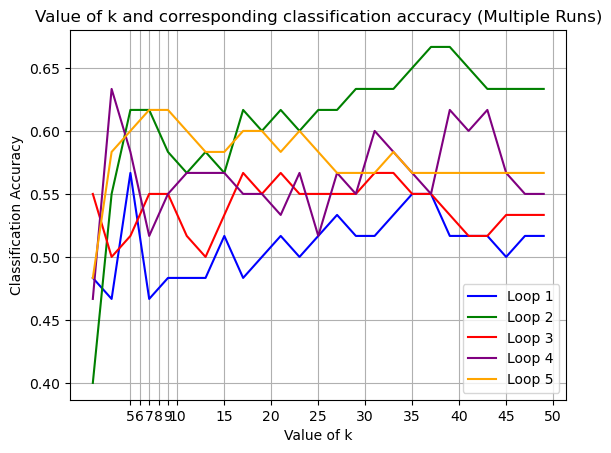

In [65]:
# To further investigate what number of neighbors is most beneifical to this particular model
# using this particular dataset, I will plot the results of testing neighbor numbers over five
# iterations to observe trends. I will need to re-split the dataset each time to simulate random
# input data and observe meaningful results.

colors = ['blue', 'green', 'red', 'purple', 'orange']

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(df[['read','write','math', 'science']], df['prog_code'], test_size=.3)
    
    # Loop over a range of k values from 1 to 50 in steps of 2 to find the best k for the classifier
    results = []

    for k in range(1, 51, 2):
        classifier = KNeighborsClassifier(n_neighbors=k)  
        classifier.fit(X_train, y_train) 
        prediction = classifier.predict(X_test)  
        accuracy = np.where(prediction==y_test, 1, 0).sum() / len(y_test)
        # print("k=", k, " Accuracy=", accuracy)
        results.append([k, accuracy])  

    # Convert results list to a DataFrame for easy plotting
    results = pd.DataFrame(results, columns=["k", "accuracy"])
    plt.plot(results.k, results.accuracy, label=f"Loop {i+1}", color=colors[i])

# Plot the relationship between various k and accuracy
plt.xlabel("Value of k")
plt.ylabel("Classification Accuracy")
plt.title("Value of k and corresponding classification accuracy (Multiple Runs)")
plt.xticks(ticks=[5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.grid(True)
plt.legend()
plt.show()

In [67]:
# Since it seems that for neighbor values of 6 the model had the highest
# accuracy, let us modify the number of neighbors and reevaluate
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

prediction = classifier.predict(X_test)
correct = np.where(prediction==y_test, 1, 0).sum()
accuracy = correct / len(y_test)

print(f"Amount of correct predcitions: {correct} out of {len(y_test)}")
print(f"Accuracy rate: {(accuracy*100):.0f}%")

# It seems that this investigation did raise the accuracy of our model by 10%.

Amount of correct predcitions: 35 out of 60
Accuracy rate: 58%
